# 4. 시각화 도구

# <Matplotlib-기본 그래프 도구>

 - 시각화 도구, 그래프를 이용하면 데이터의 구조와 패턴을 파악하기가 용이하고, 다양한 관점에서 데이터에 관한 통찰력을 제공함. 
 - Matplotlib은 파이썬 표준 시각화 도구, 2D 평면 그래프에 관한 다양한 포맷과 기능을 지원.

# [1-1] 선그래프

선 그래프는 연속하는 데이터 값들을 직선 또는 곡선으로 연결하여 데이터 값 사이의 관계를 나타냄.

 특히, 시계열 데이터에 적합.
(시도 간 인구 이동 데이터셋 이용)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel('C:/data/시도별 전출입 인구수.xlsx',engine='openpyxl', header=0)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


 - fillna() : method='ffill'옵션을 사용하면 누락데이터가 들어있는 행의 바로 앞에 위치한 행의 데이터 값으로 채움.
 - 데이터를 필터링하는 방법은 뒤에서 더 자세히 다룰 예정.

In [6]:
df = df.fillna(method='ffill')

#서울에서 다른 지역으로 전출하는 데이터 추출
mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

df_seoul.head(8)

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515,13632,13819,13900,14080,13440,13403,13453,12619,11815
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057,4845,4742,5188,5691,5542,6047,5950,5102,4260
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998,2851,6481,7550,5943,5813


In [7]:
#서울에서 경기로 이동한 데이터값만 선택.
sr_one = df_seoul.loc['경기도']
sr_one.head()

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
Name: 경기도, dtype: object

선그래프를 그리는 plot( )함수에 입력할 x,y축 데이터를 선택.

시리즈의 인덱스를 x축 데이터로, 데이터 값을 y축 데이터로 plot( )함수에 전달.

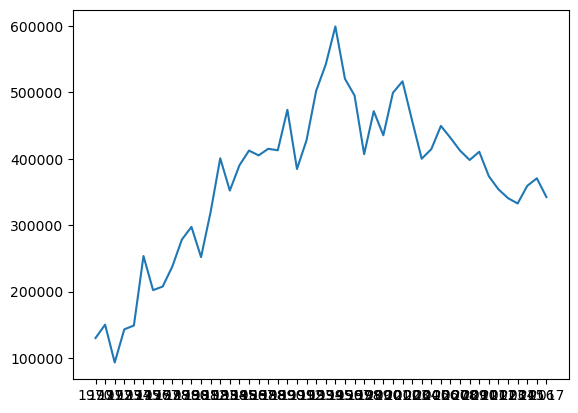

In [8]:
plt.plot(sr_one.index, sr_one.values)

시리즈 또는 데이터 프레임 객체를 plot( )함수에 직접 입력하는 것도 가능.

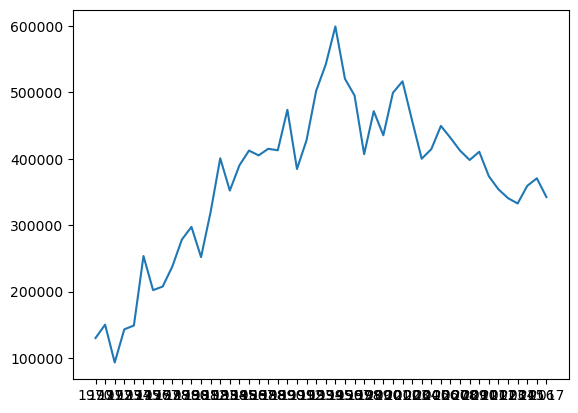

In [9]:
plt.plot(sr_one)

-------------------------------------------
1. 차트 제목, 축 이름 추가
 - title() : 차트 제목을 추가
 - xlabel(), ylabel() : x축, y축 이름을 추가

C:\Users\june0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\june0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872 (\N{HANGUL SYLLABLE UL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\june0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\june0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\june0\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\june0\anaconda3\

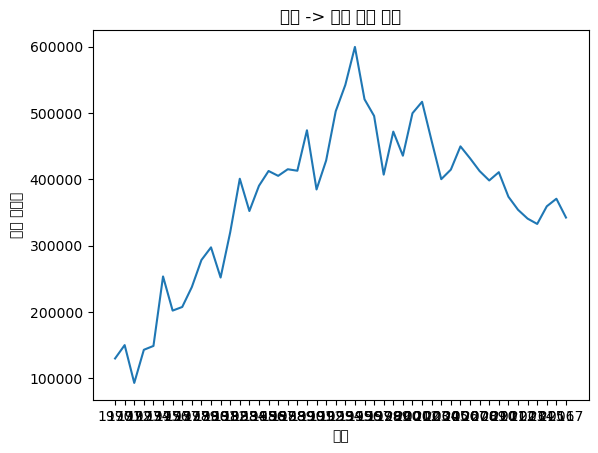

In [10]:
sr_one = df_seoul.loc['경기도']
plt.plot(sr_one.index, sr_one.values)

plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()

-> Matplotlib에서는 한글을 사용할 때 글자가 깨지는 현상이 발생.

2. Matplotlib 한글 폰트 오류 해결
  : 파이썬 프로그램 앞부분에 한글 폰트를 지정하는 다음의 코드 추가

In [11]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

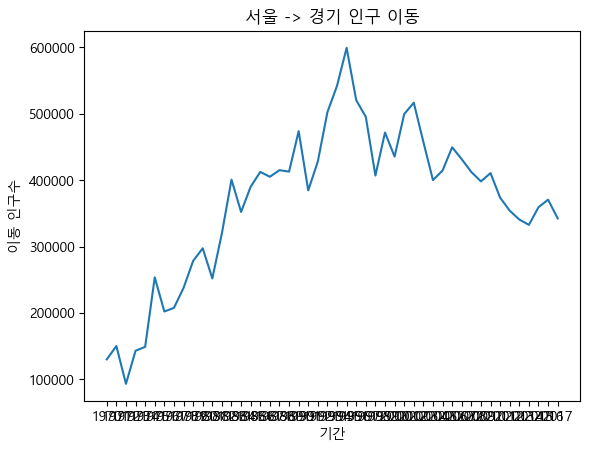

In [12]:
df = pd.read_excel('C:/data/시도별 전출입 인구수.xlsx',engine='openpyxl', header=0)

df = df.fillna(method='ffill')

mask = (df['전출지별']=='서울특별시') & (df['전입지별'] != '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

sr_one = df_seoul.loc['경기도']

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.show()

3. 그래프 꾸미기
- figure( ) : 그림틀의 가로 사이즈를 크게 설정하여 글씨가 들어갈 수 있는 공간을 확보.
- xticks()로 x축 눈금 라벨을 반시계 방향으로 90도 회전하여 글씨가 서로 겹치지 않게 만듦.  

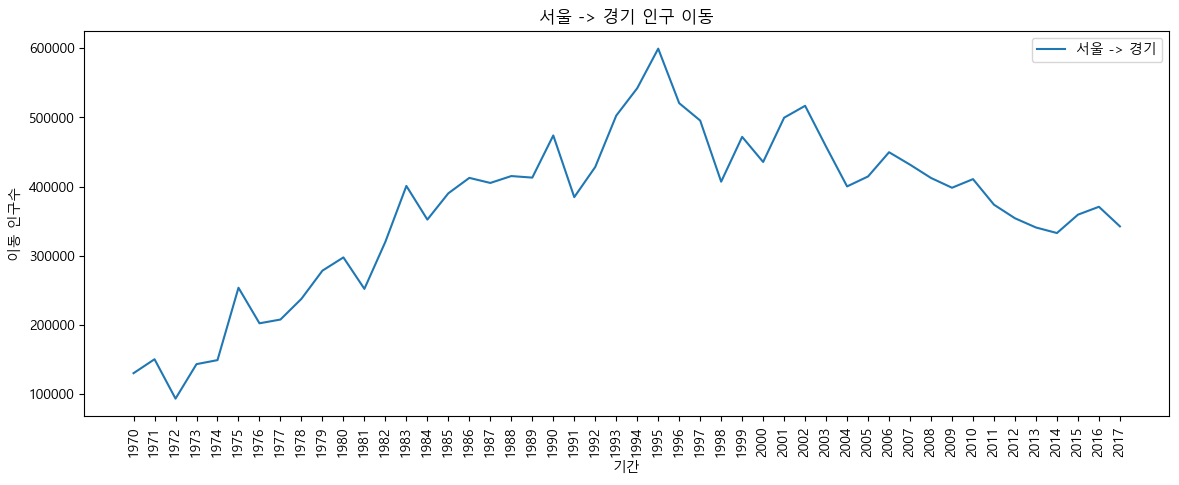

In [13]:
sr_one = df_seoul.loc['경기도']

plt.figure(figsize=(14,5))
plt.xticks(rotation='vertical')

plt.plot(sr_one.index, sr_one.values)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간')
plt.ylabel('이동 인구수')
plt.legend(labels=['서울 -> 경기'], loc='best')
plt.show()

 - 스타일 서식 지정( 색,폰트..): 스타일 서식을 지정하는 것은 Matplotlib 실행 환경 설정을 변경하는 것이므로 다른 파일을 실행할 때도 계속 적용됨.

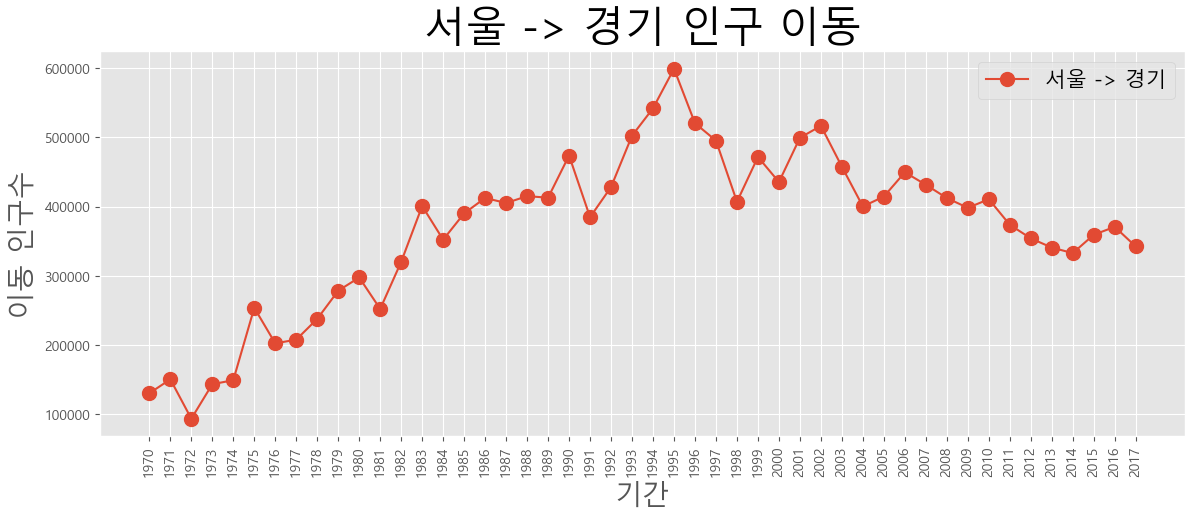

In [14]:
sr_one = df_seoul.loc['경기도']

#스타일 서식 지정
plt.style.use('ggplot')

plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')

#x,y축 데이터를 plot함수에 입력.원 모양 점.
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)
plt.show()

주석을 처리하는 방법
- annotate( ) : 주석 내용을 넣을 위치와 정렬 방법

    - arrowpoprs옵션을 사용하면 텍스트 대신 화살표가 표시.  화살표 스타일, 시작점과 끝점의 좌표를 입력.
    - 위치를 나타내는 (x,y)좌표에서 x값은 인덱스 번호를 사용하고, y값은 좌표 그대로 숫자값 사용.
    - rotataion 옵션에서 양의 회전 방향은 반시계 방향.

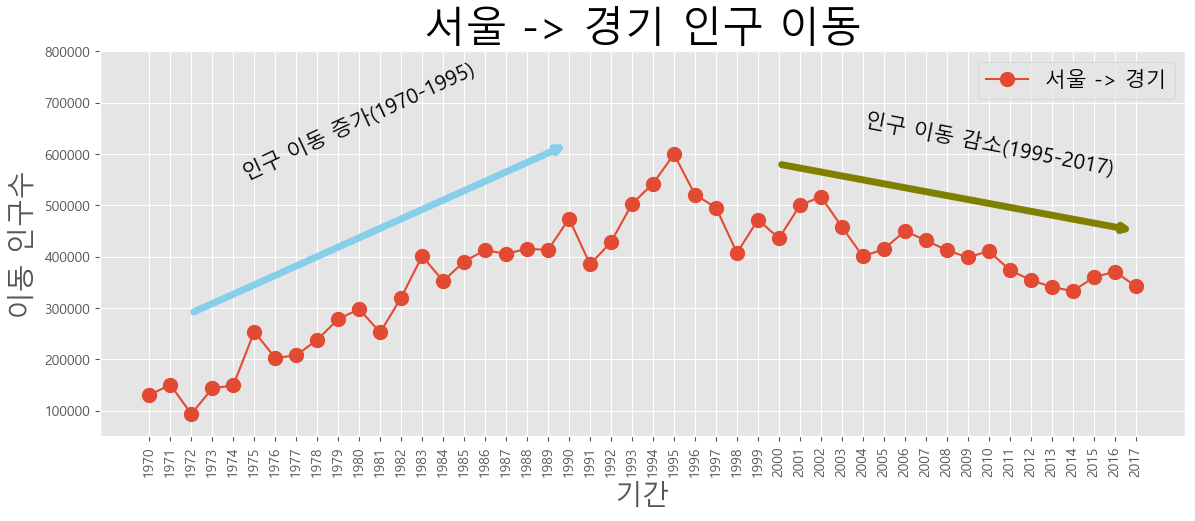

In [16]:
plt.figure(figsize=(14,5))
plt.xticks(size=10, rotation='vertical')

plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)

plt.title('서울 -> 경기 인구 이동', size=30)
plt.xlabel('기간', size=20)
plt.ylabel('이동 인구수', size=20)

plt.legend(labels=['서울 -> 경기'], loc='best', fontsize=15)

plt.ylim(50000,800000)

#주석 표시 -화살표
plt.annotate('', 
             xy=(20,620000),     #화살표의 머리부분
            xytext=(2,290000),   #화살표의 꼬리부분
            xycoords='data',     #좌표체계
            arrowprops=dict(arrowstyle='->', color='skyblue', lw=5),)
plt.annotate('',
             xy=(47,450000),
            xytext=(30,580000),
            xycoords='data',
            arrowprops=dict(arrowstyle='->', color='olive', lw=5),)


#주석표시 -텍스트
plt.annotate('인구 이동 증가(1970-1995)',
            xy=(10,550000),   #텍스트 위치 기준점
            rotation=25,      #텍스트 회전 각도
            va='baseline',    #텍스트 상하 정렬
            ha='center',      #텍스트 좌우 정렬
            fontsize=15,)
plt.annotate('인구 이동 감소(1995-2017)',
            xy=(40,560000),
            rotation=-11, 
            va='baseline',
            ha='center',
            fontsize=15,)

plt.show()

4. 화면 분할하여 그래프 여러 개 그리기 - axe 객체 활용

여러개의 axe 객체를 만들고, 분할된 화면마다 aaxe 객체를 하나씩 배정한다.
 - fig()를 사용하여 그래프를 만드는 그림틀을 만듦.
     - add_subplot()메소드를 적용하여 그림틀을 여러개로 분할. 인자에 "행의 크기,열의 크기, 서브플롯 크기"를 순서대로 입력.

C:\Users\june0\AppData\Local\Temp\ipykernel_4764\2296585115.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(sr_one.index, rotation=75)
C:\Users\june0\AppData\Local\Temp\ipykernel_4764\2296585115.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(sr_one.index, rotation=75)


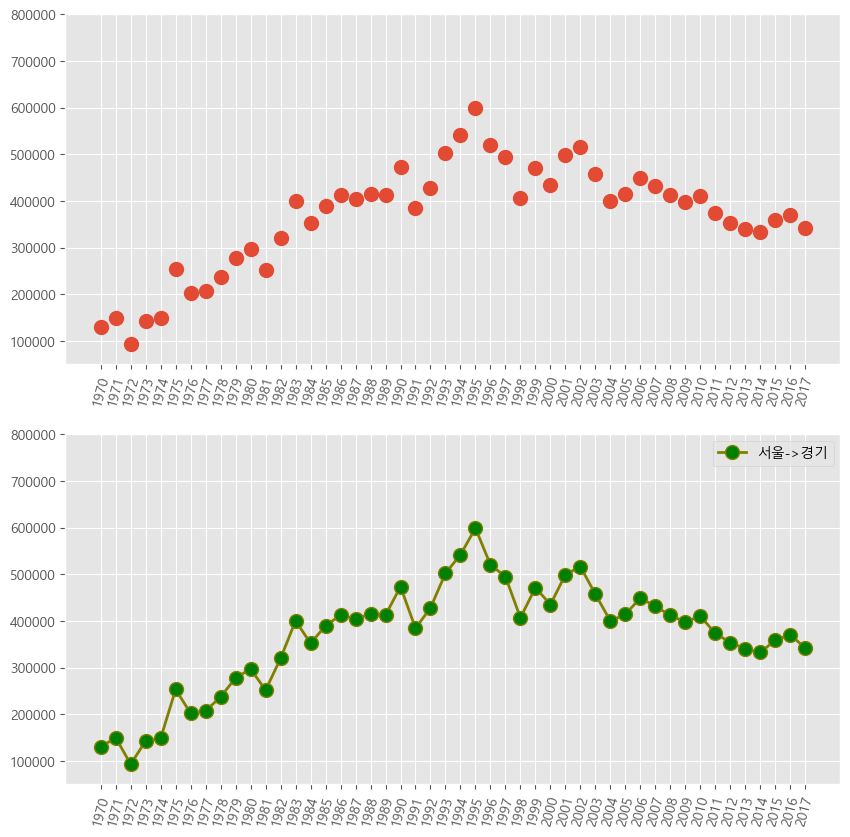

In [18]:
#그래프 객체 생성
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

#axe객체에 plot함수로 그래프 출력
ax1.plot(sr_one, 'o', markersize=10) 
ax2.plot(sr_one, marker='o', markerfacecolor='green', 
         markersize=10, color='olive', linewidth=2, label=('서울->경기'))
ax2.legend(loc='best')

#y축 범위 지정
ax1.set_ylim(50000,800000)
ax2.set_ylim(50000,800000)

#축 눈금 라벨 지정 및 75도 회전
ax1.set_xticklabels(sr_one.index, rotation=75)
ax2.set_xticklabels(sr_one.index, rotation=75)

plt.show()


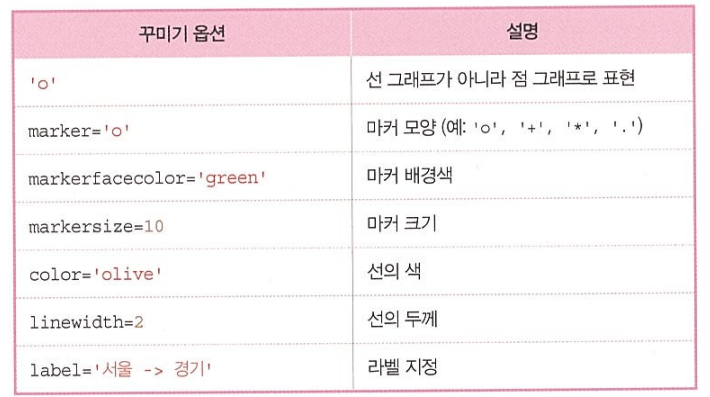

앞에서 그린 두 번째 그래프에 제목과 축 이름을 추가.

C:\Users\june0\AppData\Local\Temp\ipykernel_4764\966947555.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


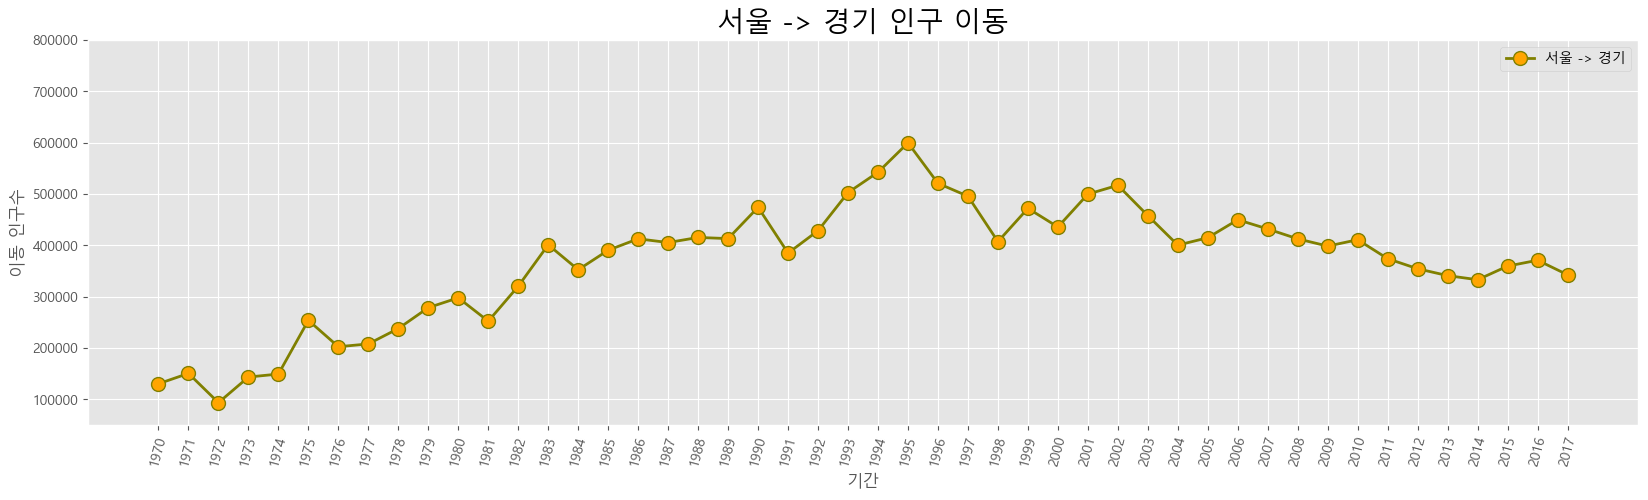

In [20]:
#그래프 객체 생성
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(sr_one, marker='o', markerfacecolor='orange', markersize=10,
       color='olive', linewidth=2, label='서울 -> 경기')
ax.legend(loc='best')

#y축 범위 지정
ax.set_ylim(50000,800000)

#차트 제목 추가
ax.set_title('서울 -> 경기 인구 이동', size=20)

#축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

#축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)

plt.show()

동일한 그림에 여러 개의 그래프를 추가하는 것도 가능. 

(각 항목에 해당하는 행을 선택하고, 동일한 axe 객체에 선 그래프로 출력하는 plot 메소드를 3번 적용)

C:\Users\june0\AppData\Local\Temp\ipykernel_4764\996941601.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(sr_one.index, rotation=75)


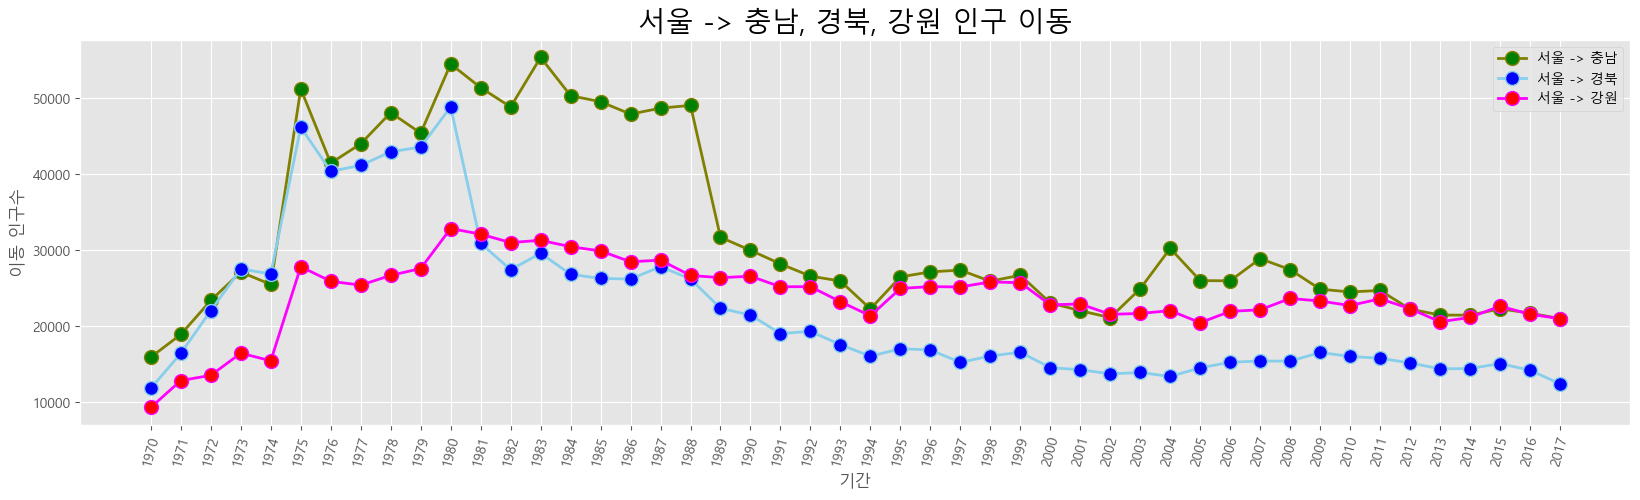

In [22]:
#서울에서 '충청남도','경상북도','강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_3 = df_seoul.loc[['충청남도','경상북도','강원도'],col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)

#axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green',
       markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상북도',:], marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df_3.loc['강원도',:], marker='o', markerfacecolor='red',
       markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')

# 범례 표시
ax.legend(loc='best')

#차트 제목 추가
ax.set_title('서울 -> 충남, 경북, 강원 인구 이동', size=20)

#축 이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)

#축 눈금 라벨 지정 및 75도 회전
ax.set_xticklabels(sr_one.index, rotation=75)

#축 눈금 라벨 크기
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


C:\Users\june0\AppData\Local\Temp\ipykernel_4764\3367581191.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(col_years, rotation=90)
C:\Users\june0\AppData\Local\Temp\ipykernel_4764\3367581191.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(col_years, rotation=90)
C:\Users\june0\AppData\Local\Temp\ipykernel_4764\3367581191.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(col_years, rotation=90)
C:\Users\june0\AppData\Local\Temp\ipykernel_4764\3367581191.py:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(col_years, rotation=90)


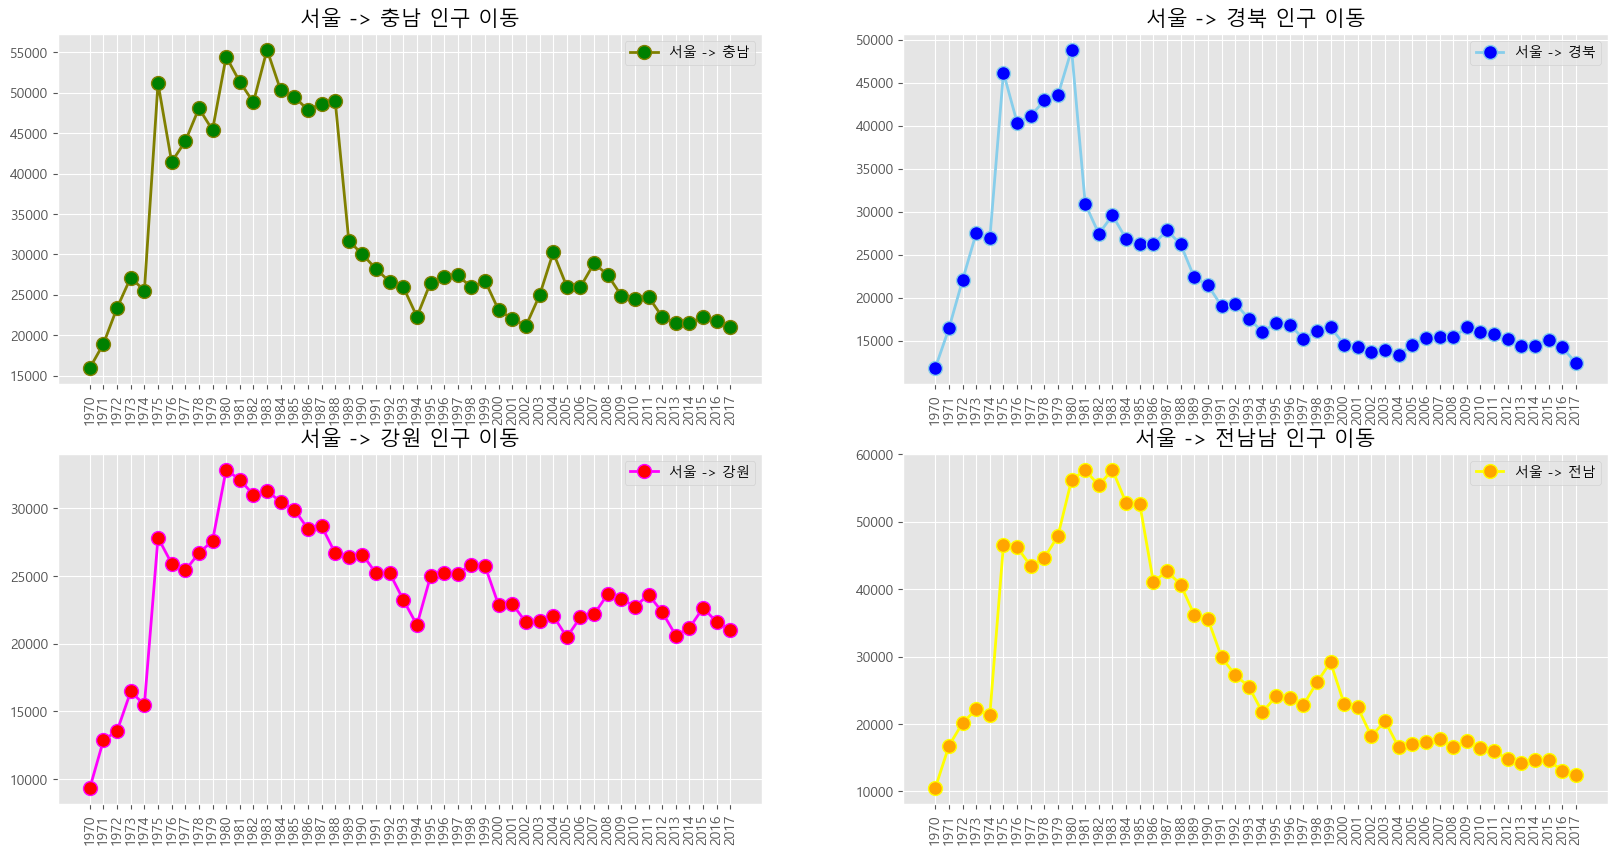

In [23]:
#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(1970,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

#스타일 서식 지정
plt.style.use('ggplot')

#그래프 객체 생성
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

#axe 객체에 plot 함수로 그래프 출력
ax1.plot(col_years, df_4.loc['충청남도',:], marker='o', markerfacecolor='green',
       markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax2.plot(col_years, df_4.loc['경상북도',:], marker='o', markerfacecolor='blue',
       markersize=10, color='skyblue', linewidth=2, label='서울 -> 경북')
ax3.plot(col_years, df_4.loc['강원도',:], marker='o', markerfacecolor='red',
       markersize=10, color='magenta', linewidth=2, label='서울 -> 강원')
ax4.plot(col_years, df_4.loc['전라남도',:], marker='o', markerfacecolor='orange',
       markersize=10, color='yellow', linewidth=2, label='서울 -> 전남')

# 범례 표시
ax1.legend(loc='best')
ax2.legend(loc='best')
ax3.legend(loc='best')
ax4.legend(loc='best')

#차트 제목 추가
ax1.set_title('서울 -> 충남 인구 이동', size=15)
ax2.set_title('서울 -> 경북 인구 이동', size=15)
ax3.set_title('서울 -> 강원 인구 이동', size=15)
ax4.set_title('서울 -> 전남남 인구 이동', size=15)

#축 눈금 라벨 지정 및 90도 회전
ax1.set_xticklabels(col_years, rotation=90)
ax2.set_xticklabels(col_years, rotation=90)
ax3.set_xticklabels(col_years, rotation=90)
ax4.set_xticklabels(col_years, rotation=90)

plt.show()


# [1-2] 면적 그래프

각 열의 데이터를 선 그래프로 구현하는데, 그 선그래프와 x축 사이의 공간에 색이 입혀진다. plot () 메소드에 kind='area'옵션을 추가하면그릴 수 있음.
 - 투명도(alpha)는 기본값 0.5
 - 그래프를 누적할지 여부를 설정. 기본값은 stacked=True.각 열의 선 그래프를 다른 열의 선 그래프 위로 쌓아 올리는 방식으로 표현.

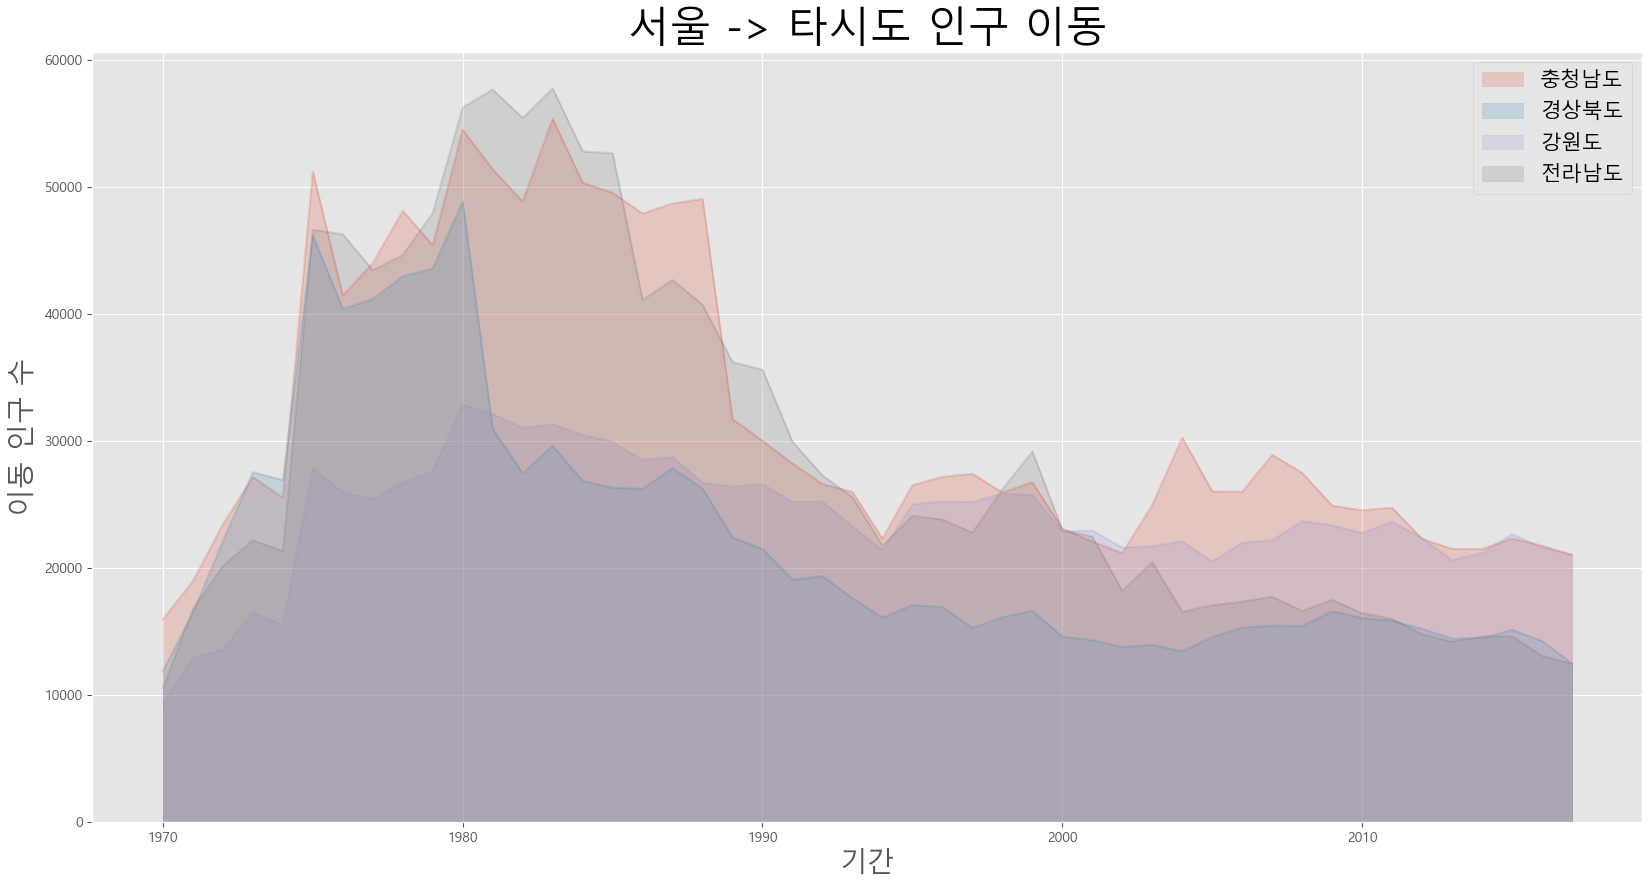

In [24]:
#서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별']=='서울특별시') & (df['전입지별']!= '서울특별시')
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

#서울에서 '충청남도', '경상북도', '강원도' 로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도'], col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area', stacked=False, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

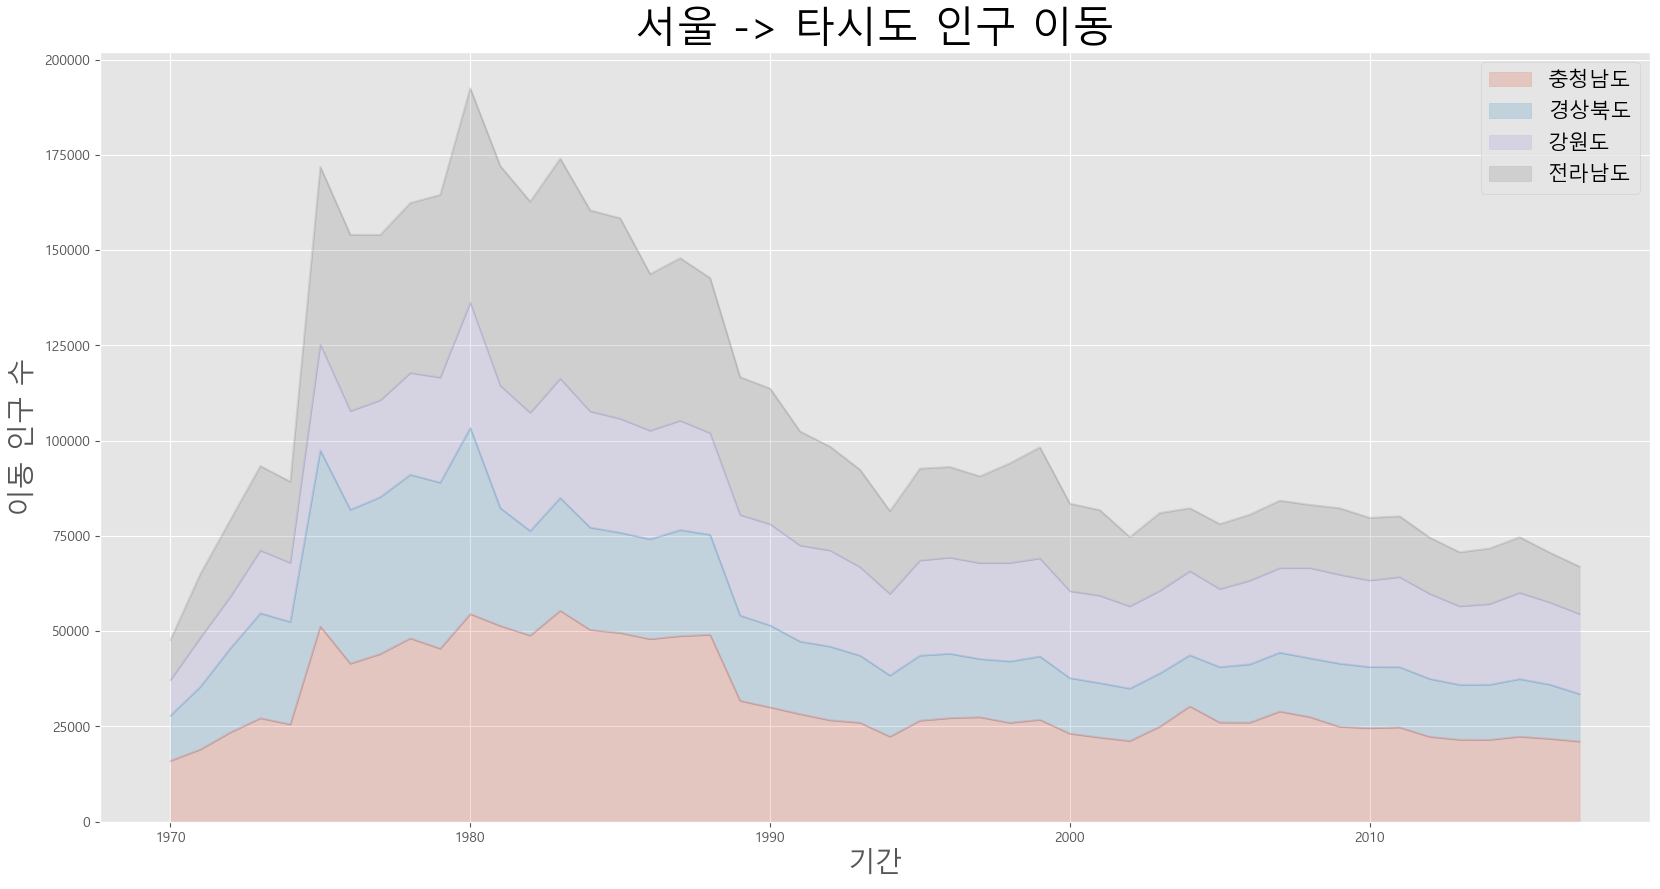

In [25]:
#데이터프레임의 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)

#면적 그래프 그리기
df_4.plot(kind='area',stacked=True, alpha=0.2, figsize=(20,10))

plt.title('서울 -> 타시도 인구 이동', size=30)
plt.ylabel('이동 인구 수', size=20)
plt.xlabel('기간', size=20)
plt.legend(loc='best', fontsize=15)

plt.show()

axe 객체의 세부적인 요소를 설정할 수 있음.

<class 'matplotlib.axes._subplots.AxesSubplot'>


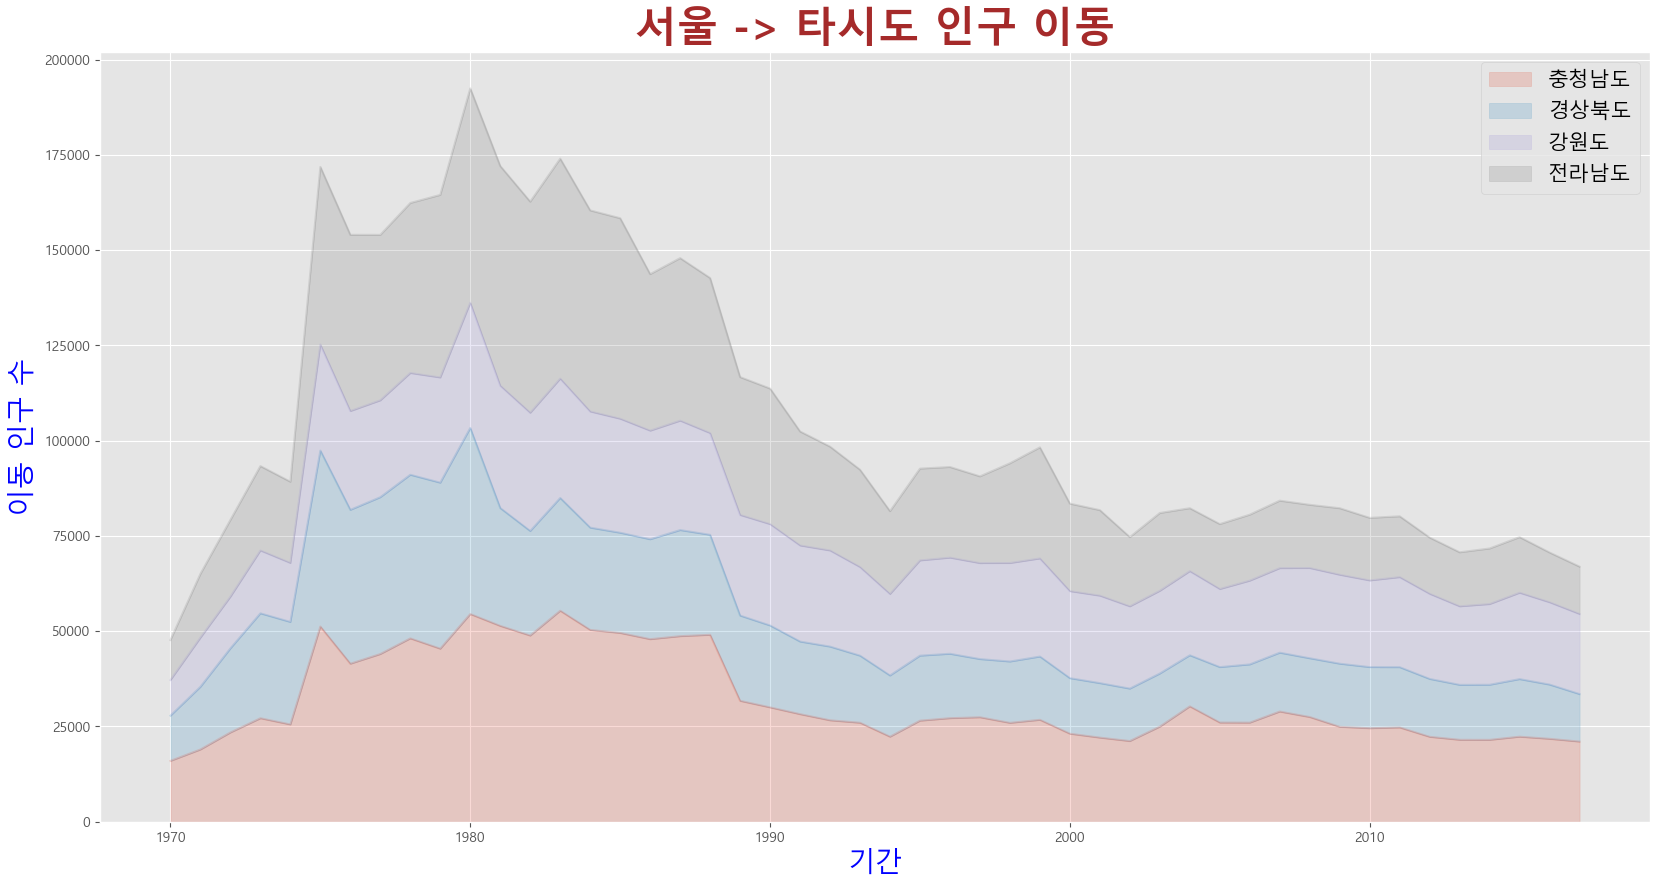

In [26]:
#데이터 프레임의 인덱스를 정수형으로 변경
df_4.index = df_4.index.map(int)

#면적 그래프 axe 객체 생성
ax = df_4.plot(kind='area', stacked=True, alpha=0.2, figsize = (20,10))
print(type(ax))

#axe 객체 설정 변경
ax.set_title('서울 -> 타시도 인구 이동', size=30, color='brown', weight='bold')
ax.set_ylabel('이동 인구 수', size=20, color='blue')
ax.set_xlabel('기간', size=20, color='blue')
ax.legend(loc='best', fontsize=15)

plt.show()

# [1-3] 막대 그래프

 데이터 값의 크기에 비례하여 높이를 갖는 직사각형 막대.
  - 세로형 막대 그래프는 시간적으로 차이가 나는 두점에서 데이터 값의 차이를 잘 설명함. 특히, 시계열 데이터.
  - plot( ) 메소드에 kind='bar'옵션을 입력. color옵션을 추가하여 막대 색상을 다르게 설정.

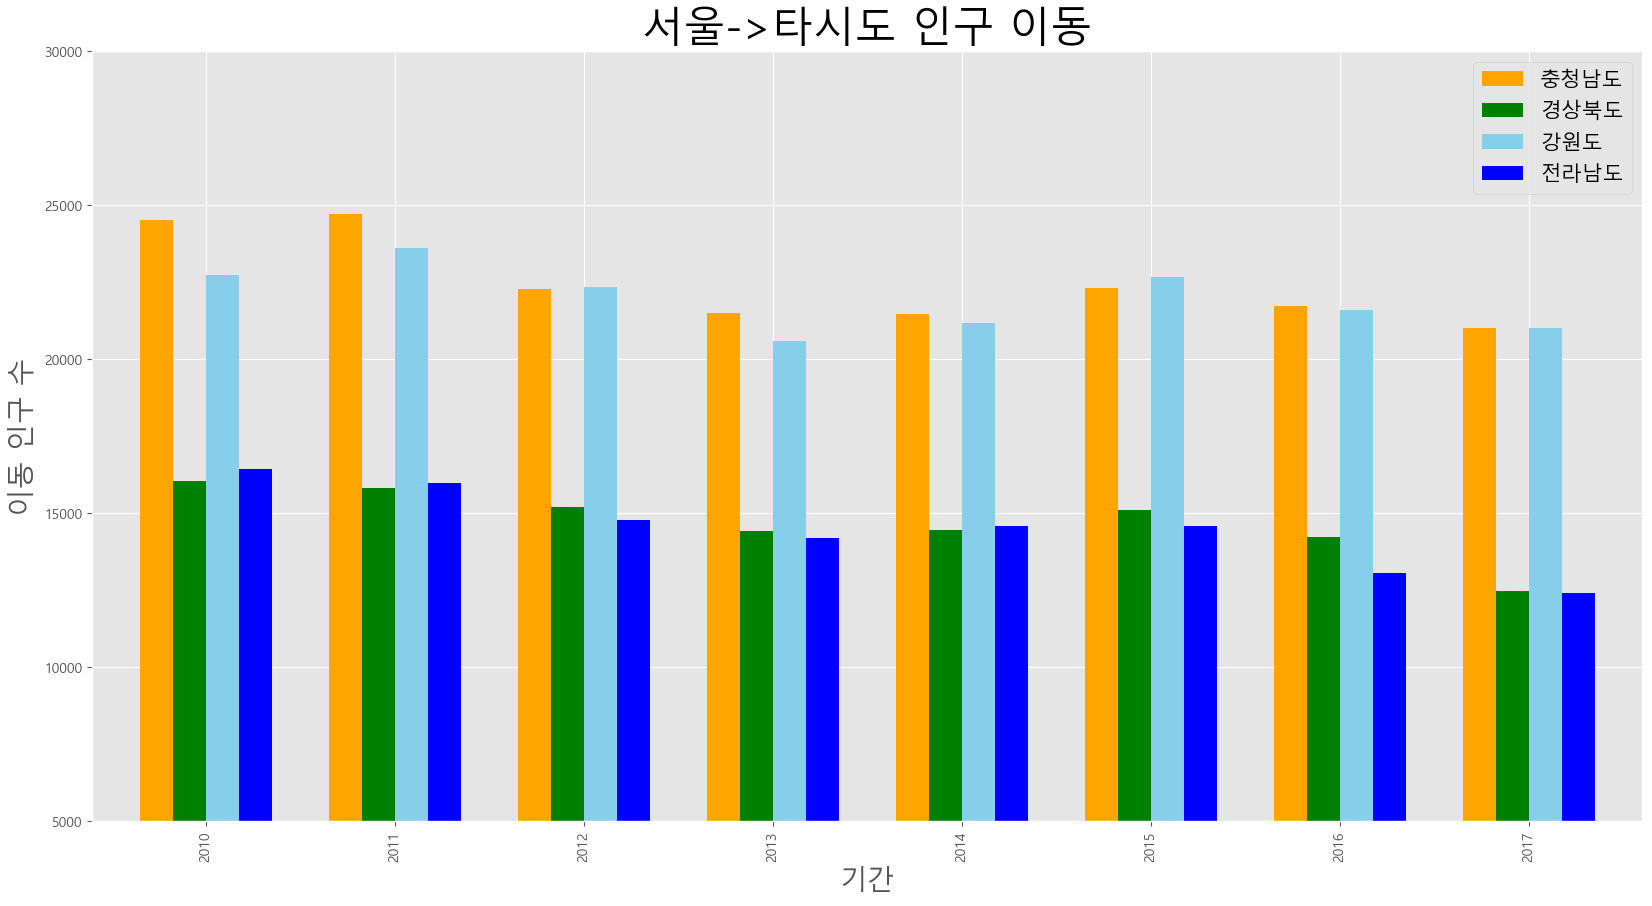

In [28]:
#서울에서 '충청남도','경상북도','강원도','전라남도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]
df_4 = df_4.transpose()

#스타일 서식 지정
plt.style.use('ggplot')

#데이터프레임의 인덱스를 정수형으로 변경(x축 눈금 라벨 표시)
df_4.index = df_4.index.map(int)

#막대 그래프 그리기
df_4.plot(kind='bar',figsize=(20,10), width=0.7, color=['orange','green','skyblue','blue'])

plt.title('서울->타시도 인구 이동',size=30)
plt.ylabel('이동 인구 수',size=20)
plt.xlabel('기간',size=20)
plt.ylim(5000,30000)
plt.legend(loc='best',fontsize=15)

plt.show()
     

 - plot()메소드의 옵션으로 kind='barh'를 입력.

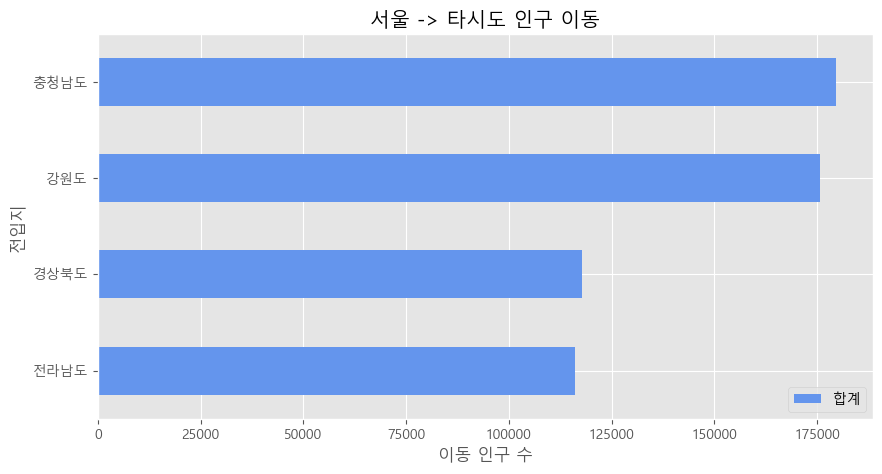

In [29]:
col_years = list(map(str,range(2010,2018)))
df_4 = df_seoul.loc[['충청남도','경상북도','강원도','전라남도'],col_years]

#2010-2017년 이동 인구 수를 합계하여 새로운 열로 추가.
df_4['합계'] = df_4.sum(axis=1)

#가장 큰 값부터 정렬.
df_total = df_4[['합계']].sort_values(by='합계', ascending=True)

#스타일 서식 지정
plt.style.use('ggplot')

#수평 막대 그래프 그리기
df_total.plot(kind='barh',color='cornflowerblue',width=0.5, figsize=(10,5))

plt.title('서울 -> 타시도 인구 이동')
plt.ylabel('전입지')
plt.xlabel('이동 인구 수')

plt.show()

** 보조 축 활용하기

보조 축을 추가하여 2개의 y축을 갖는 그래프를 그림. 

# [1-4] 히스토그램

히스토그램은 변수가 하나인 단변수 데이터의 빈도수를 그래프로 표현.

x축을 같은 크기의 여러 구간으로 나누고 각 구간에 속하는 데이터 값의 개수를 y축에 표시함. 

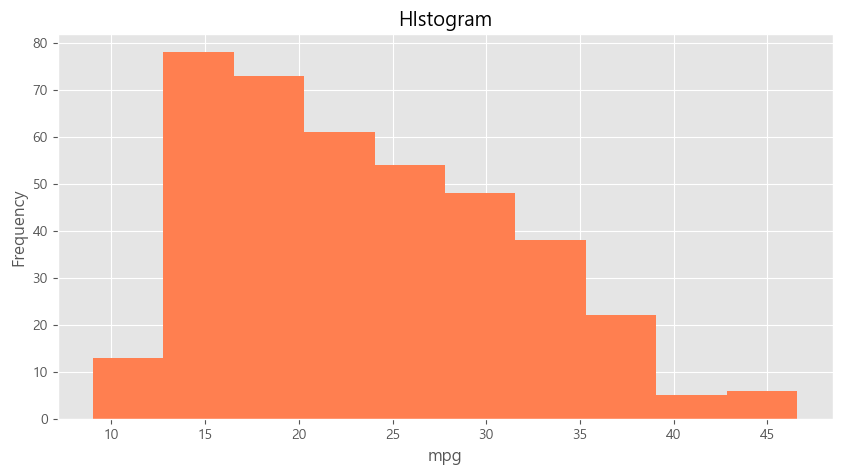

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('C:/data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
             'model year','origin','name']

#연비 열에 대한 히스토그램 그리기
df['mpg'].plot(kind='hist',bins=10, color='coral', figsize=(10,5))

#그래프 꾸미기
plt.title('HIstogram')
plt.xlabel('mpg')
plt.show()

# [1-5] 산점도

산점도(scatter plot)는 서로 다른 두 연속 변수 사이의 관계를 나타냄. 2개의 연속 변수를 각각 x축 y축에 하나씩 놓고, 데이터 값이 위치하는 (x,y)좌포를 찾아서 점으로 표시함. 
 - plot() 메소드에 kind='scatter'옵션을 사용
 - x='weight' 옵션을 사용하여 x축에 위치할 변수를 선택.

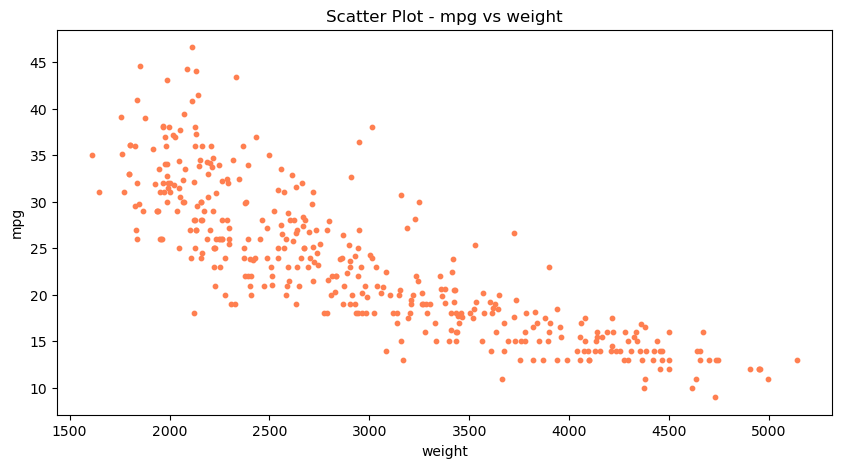

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('C:/data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
             'model year','origin','name']

df.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10,5))
plt.title('Scatter Plot - mpg vs weight')
plt.show()

새로운 변수를 추가해서 점의 크기 또는 색상으로 표현할 수 있다. 

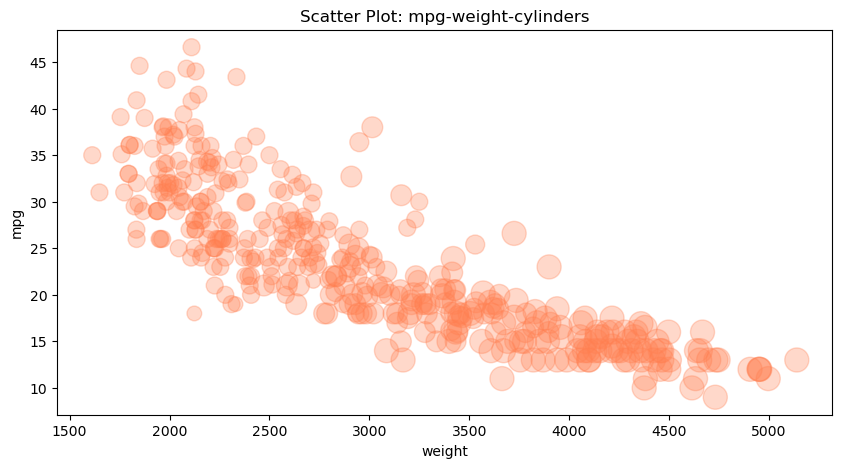

In [33]:
#cylinders 개수의 상대적 비율을 계산하여 시리즈 생성
cylinders_size = df.cylinders/df.cylinders.max() *300

#3개의 변수로 산점도 그리기
df.plot(kind = 'scatter', x='weight',y= 'mpg', c='coral', figsize=(10,5),
       s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')
plt.show()

** 그래프를 그림 파일로 저장
 : 산점도를 "scatter.png"라는 파일명으로 저장. 

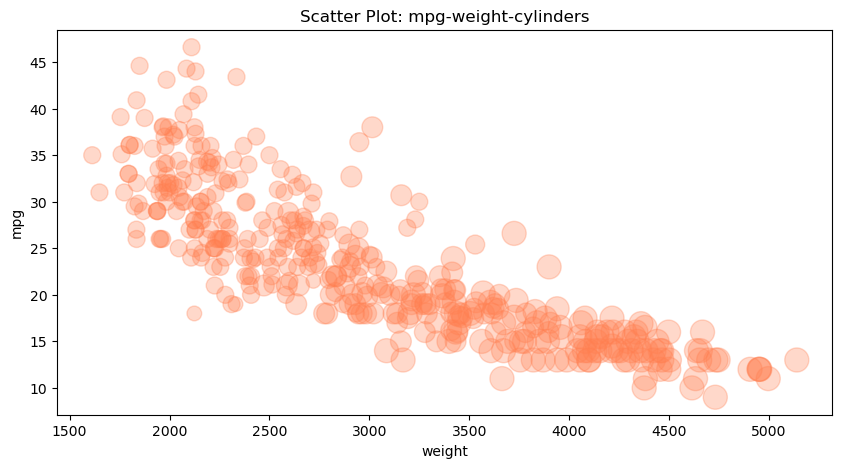

In [35]:
cylinders_size = df.cylinders/df.cylinders.max() *300

df.plot(kind = 'scatter', x='weight',y= 'mpg', c='coral', figsize=(10,5),
       s=cylinders_size, alpha=0.3)
plt.title('Scatter Plot: mpg-weight-cylinders')

plt.savefig('C:/data/scatter.png')
plt.savefig('C:/data/scatter_transparent.png', transparent=True)

plt.show()

# [1-6] 파이 차트

파이차트는 원을 파이 조각처럼 나누어서 표현. 조각의 클기는 해당 변수에 속하는 데이터 값의 크기에 비례. 
 - plot() 메소드에 kind='pie'옵션을 사용하여 그림. 

           mpg  cylinders  displacement    weight  acceleration  model year  \
origin                                                                        
1       5000.8       1556       61229.5  837121.0        3743.4       18827   
2       1952.4        291        7640.0  169631.0        1175.1        5307   
3       2405.6        324        8114.0  175477.0        1277.6        6118   

        count  
origin         
1         249  
2          70  
3          79  


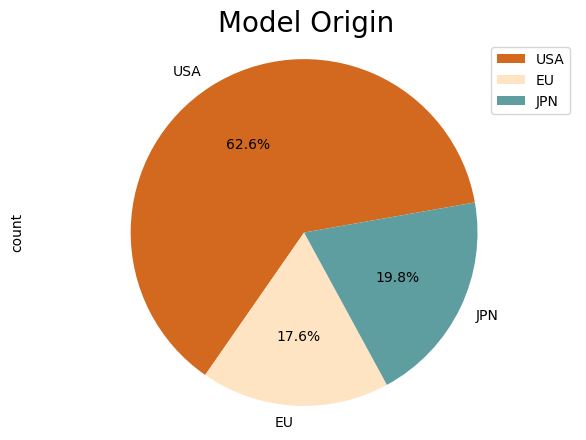

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('default')

df = pd.read_csv('C:/data/auto-mpg.csv', header=None)

df.columns = ['mpg','cylinders','displacement','horsepower','weight','acceleration',
             'model year','origin','name']

df['count']=1
df_origin = df.groupby('origin').sum()
print(df_origin.head())

#제조국가(origin) 값을 실제 지역명으로 변경
df_origin.index = ['USA','EU','JPN']

#제조국가(origin) 열에 대한 파이 차트 그리기 - count 열 데이터 사용
df_origin['count'].plot(kind='pie',
                        figsize=(7,5),
                        autopct='%1.1f%%',   #퍼센트 % 표시
                        startangle=10,     #파이 조각을 나누는 시작점(각도 표시)
                        colors=['chocolate','bisque','cadetblue'])   #색상 리스트

plt.title('Model Origin',size=20)
plt.axis('equal')   #파이 차트의 비율을 같게(원에 가깝게) 조정
plt.legend(labels=df_origin.index,loc='upper right')   #범례 표시
plt.show()

# [1-7] 박스 플롯

박스플롯은 범주형 데이터의 분포를 파악하는 데 적합.

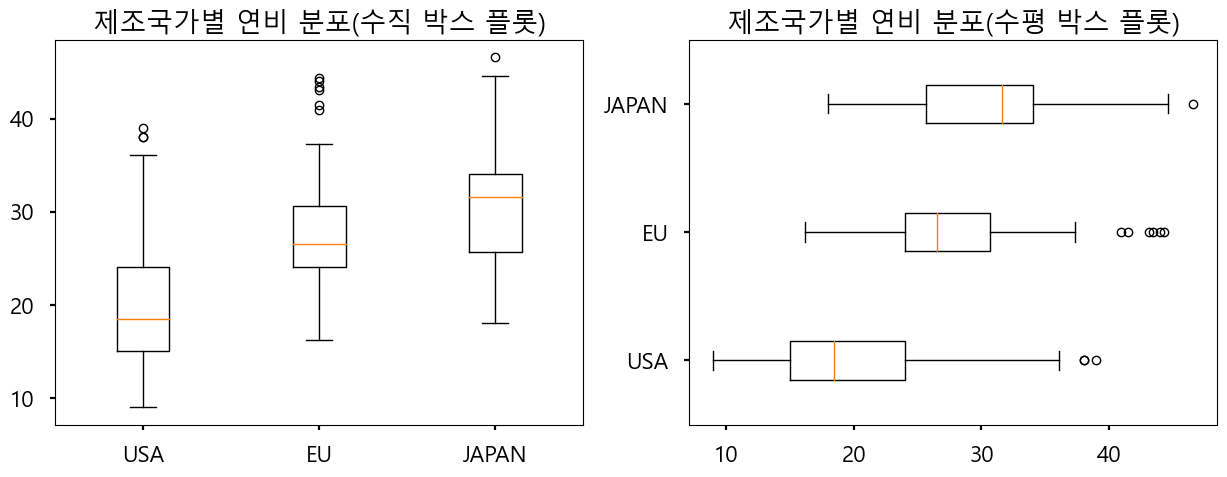

In [38]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf" 
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

plt.style.use('seaborn-poster')
plt.rcParams['axes.unicode_minus']=False

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

#axe 객체에 boxplot 메소드로 그래프 출력
ax1.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN']
            )

ax2.boxplot(x=[df[df['origin']==1]['mpg'],
               df[df['origin']==2]['mpg'],
               df[df['origin']==3]['mpg']],
            labels=['USA','EU','JAPAN'],
            vert=False
            )

ax1.set_title('제조국가별 연비 분포(수직 박스 플롯)')
ax2.set_title('제조국가별 연비 분포(수평 박스 플롯)')

plt.show()